# Ejercicio

Se le brinda un set de adtos sintéticos a los cuales debe de aplicarle el método de K-Means y el de GMM. 
Al finalizar comparar los resultados.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.mixture import GaussianMixture
import warnings
warnings.filterwarnings("ignore")

In [2]:
rng = np.random.RandomState(seed=1)
X = np.concatenate([rng.normal(-1, 1.5, 350),
rng.normal(0, 1, 500),
rng.normal(3, 0.5, 150)]).reshape(-1, 1)
# Fit models with 1-10 components
k_arr = np.arange(10) + 1
models = [ GaussianMixture(n_components=k).fit(X) for k in k_arr] #TODO

In [3]:
# Plot function
def plot_mixture(gmm, X, show_legend=True, ax=None):
    if ax is None:
        ax = plt.gca()
    
    # Compute PDF of whole mixture
    x = np.linspace(-6, 6, 1000)
    logprob = gmm.score_samples(x.reshape(-1, 1))
    pdf = np.exp(logprob)
    
    # Compute PDF for each component
    responsibilities = gmm.predict_proba(x.reshape(-1, 1))
    pdf_individual = responsibilities * pdf[:, np.newaxis]

    # Plot data histogram
    ax.hist(X, 30, density=True, histtype='stepfilled', alpha=0.4, label='Data')

    # Plot PDF of whole model
    ax.plot(x, pdf, '-k', label='Mixture PDF')

    # Plot PDF of each component
    ax.plot(x, pdf_individual, '--', label='Component PDF')
    ax.set_xlabel('$x$')
    ax.set_ylabel('$p(x)$')
    if show_legend:
        ax.legend()

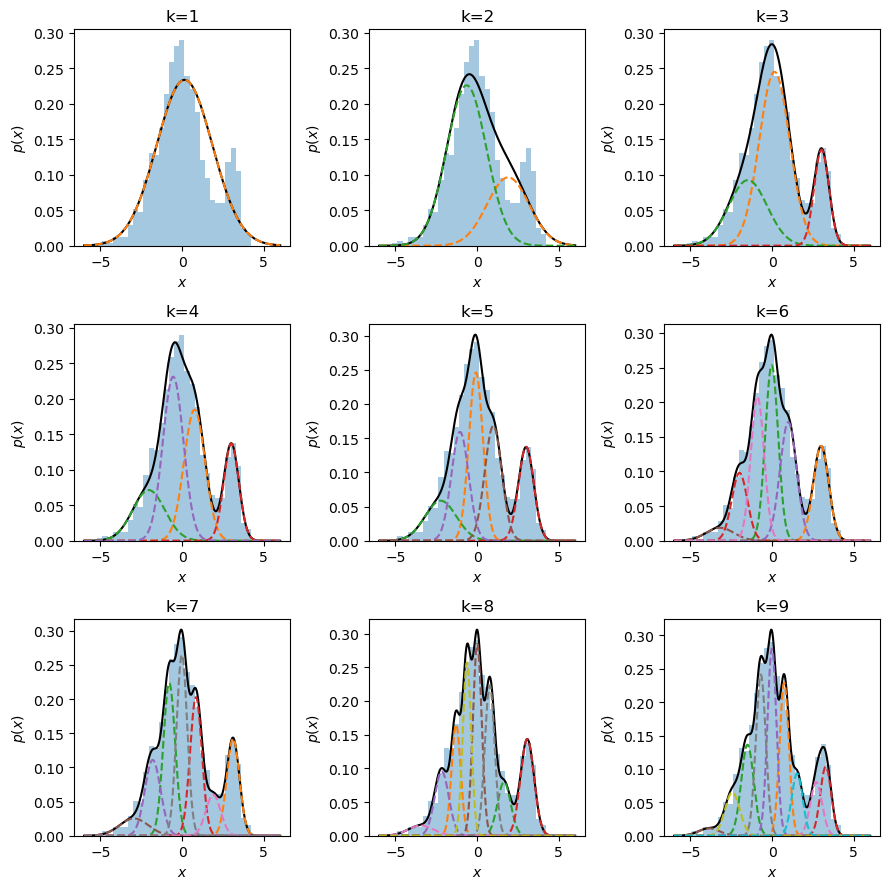

In [4]:
# Show all models for n_components 1 to 9
_, axes = plt.subplots(3, 3, figsize=np.array([3,3])*3, dpi=100)
for gmm, ax in zip(models, axes.ravel()):
    plot_mixture(gmm, X, show_legend=False, ax=ax)
    ax.set_title(f'k={gmm.n_components}')
    plt.tight_layout()

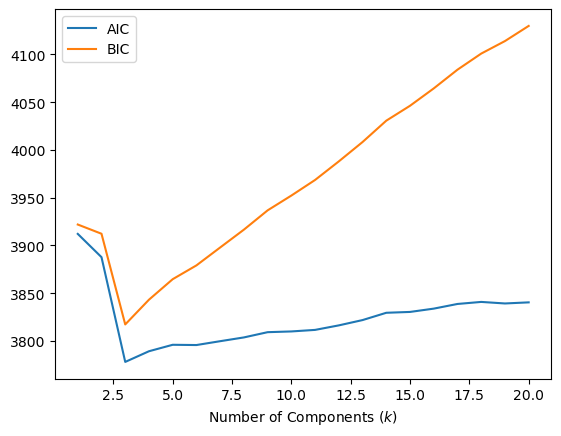

In [5]:
# Compute metrics to determine best hyperparameter
n_components = np.arange(1, 21)
models = [GaussianMixture(n, covariance_type='full', random_state=0).fit(X) for n in n_components]

AIC = [m.aic(X) for m in models]#TODO
BIC = [m.bic(X) for m in models]#TODO
# Plot these metrics
plt.plot(n_components,AIC, label='AIC')#TODO
plt.plot(n_components,BIC, label='BIC')#TODO
plt.xlabel('Number of Components ($k$)')
plt.legend()

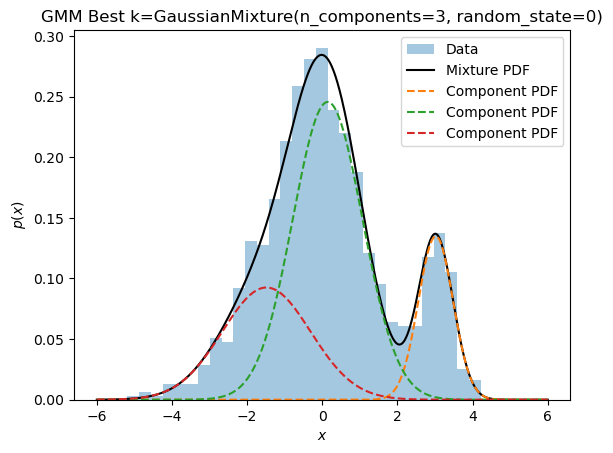

In [25]:
gmm_best = models[np.argmin(AIC)] #TODO - utilizar np.argmin() con su parámetro
k = gmm_best
plt.title(f'GMM Best k={gmm_best}')
plot_mixture(gmm_best, X)

In [26]:
k

GaussianMixture(n_components=3, random_state=0)

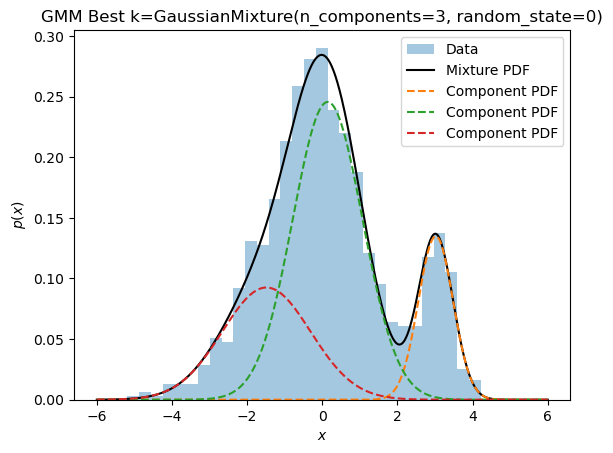

In [23]:
gmm_best = models[np.argmin(BIC)] #TODO - utilizar np.argmin() con su parámetro
plt.title(f'GMM Best k={gmm_best}')
plot_mixture(gmm_best, X)

## K-Means

(-7.6695009915020105,
 38.84428241167275,
 -1.2536474338023191,
 5.866108305124282)

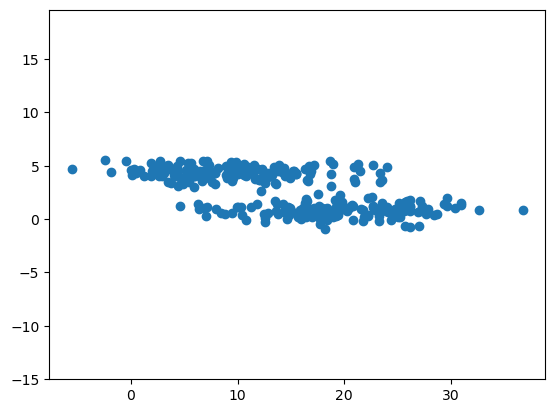

In [11]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
X3, y_true = make_blobs(n_samples=300, centers=2,
cluster_std=0.60, random_state=0)
X3[:, 0] = X3[:, 0]*10
plt.scatter(X3[:,0], X3[:,1] , cmap='rainbow') #TODO
plt.axis('equal')

(-7.6695009915020105,
 38.84428241167275,
 -1.2536474338023191,
 5.866108305124282)

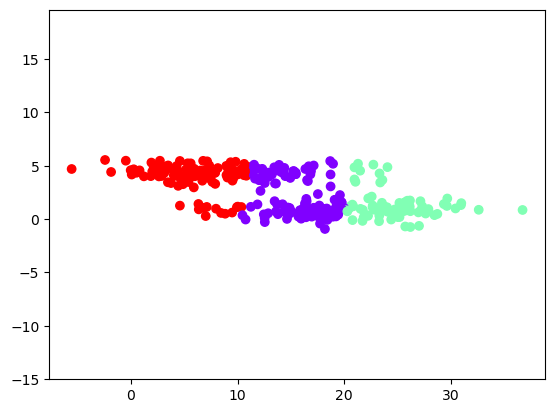

In [28]:
kmeans = KMeans(n_clusters=3, random_state=42).fit(X3) #TODO
preds = kmeans.predict(X3)
plt.scatter(X3[:,0], X3[:,1] , c=preds, cmap='rainbow') #TODO
plt.axis('equal')

## GMM

(-7.6695009915020105,
 38.84428241167275,
 -1.2536474338023191,
 5.866108305124282)

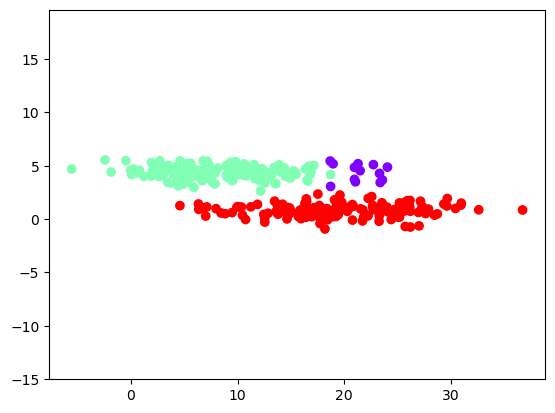

In [27]:
from sklearn.mixture import GaussianMixture
gmm = k.fit(X3)#TODO
gmm_labels = gmm.predict(X3)#TODO
plt.scatter(X3[:,0], X3[:,1] , c=gmm_labels, cmap='rainbow') #TODO
plt.axis('equal')

(-7.6695009915020105,
 38.84428241167275,
 -1.2536474338023191,
 5.866108305124282)

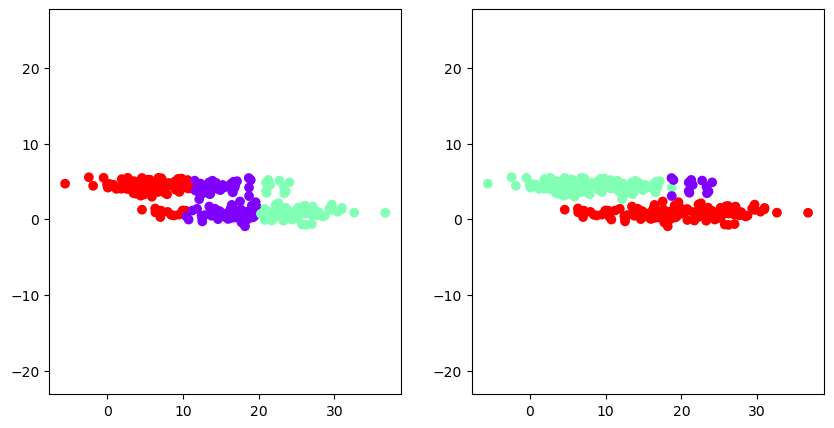

In [38]:
fig,ax = plt.subplots(1,2, figsize=(10,5))
ax[0].scatter(X3[:,0], X3[:,1] , c=preds, cmap='rainbow') #TODO
ax[1].scatter(X3[:,0], X3[:,1] , c=gmm_labels, cmap='rainbow') #TODO
ax[0].axis('equal')
ax[1].axis('equal')